Preprocessing

In [1]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
adult = fetch_ucirepo(id=2) 

In [2]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
# data (as pandas dataframes) 
Data = adult.data
x_raw = adult.data.features 
y_raw = adult.data.targets 


In [4]:
x_raw = x_raw.replace("?", np.nan)
x_raw[pd.isnull(x_raw).any(axis=1)].shape
rows_with_missing_values = x_raw[pd.isnull(x_raw).any(axis=1)]

x_raw.dropna(inplace=True)
x_raw.drop('education-num', axis=1, inplace=True)
y_raw = y_raw.drop(rows_with_missing_values.index)


In [5]:
x = pd.DataFrame(x_raw)
y = pd.DataFrame(y_raw)
x_names = x.columns.tolist()
x_names = np.array(x_names)
y_names = y.columns.tolist()

In [6]:
#print(x[10:60])
print(x['workclass'][x['workclass'] == '?'])

x['workclass'], value = pd.factorize(x_raw['workclass'])
print("1",value)
x['education'], value = pd.factorize(x_raw['education'])
print("2",value)
x['marital-status'], value = pd.factorize(x_raw['marital-status'])
print("3",value)
x['occupation'], value = pd.factorize(x_raw['occupation'])
print("4",value)
x['relationship'], value = pd.factorize(x_raw['relationship'])
print("5",value)
x['race'], value = pd.factorize(x_raw['race'])
print("6",value)
x['sex'], value = pd.factorize(x_raw['sex'])
print("7",value)
x['native-country'], value = pd.factorize(x_raw['native-country'])
print("9",value)

y['income'][y['income']=='>50K.'] = '>50K'
y['income'][y['income']=='<=50K.'] = '<=50K'
y['income'], value = pd.factorize(y['income'])

#print(x)

Series([], Name: workclass, dtype: object)
1 Index(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov',
       'Self-emp-inc', 'Without-pay'],
      dtype='object')
2 Index(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'],
      dtype='object')
3 Index(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype='object')
4 Index(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'],
      dtype='object')
5 Index(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'],
      dtype='object')
6 Index(

In [7]:
# %matplotlib widget
# import matplotlib.pyplot as plt

# # 筛选出标签为1的样本的年龄数据
# age_L50K = x_raw[y_raw['income'] == '>50K']['age']
# age_M50K = x_raw[y_raw['income'] == '<=50K']['age']

# age_L50K = (age_L50K/10).round().astype(int) *10
# age_M50K = (age_M50K/10).round().astype(int) *10

# fnlwgt_L50K = x_raw[y_raw['income'] == '>50K']['fnlwgt']
# fnlwgt_M50K = x_raw[y_raw['income'] == '<=50K']['fnlwgt']

# fnlwgt_L50K = (fnlwgt_L50K/100000).round().astype(int) 
# fnlwgt_M50K = (fnlwgt_M50K/100000).round().astype(int) 

# gain_L50K = x_raw[y_raw['income'] == '>50K']['capital-gain']
# gain_M50K = x_raw[y_raw['income'] == '<=50K']['capital-gain']

# gain_L50K = (gain_L50K /1000).round().astype(int) 
# gain_M50K = (gain_M50K/1000).round().astype(int) 

# loss_L50K = x_raw[y_raw['income'] == '>50K']['capital-loss']
# loss_M50K = x_raw[y_raw['income'] == '<=50K']['capital-loss']

# loss_L50K = (loss_L50K /1000).round().astype(int) 
# loss_M50K = (loss_M50K/1000).round().astype(int) 

# hours_L50K = x_raw[y_raw['income'] == '>50K']['hours-per-week']
# hours_M50K = x_raw[y_raw['income'] == '<=50K']['hours-per-week']

# hours_L50K = (hours_L50K /10).round().astype(int) *10
# hours_M50K = (hours_M50K/10).round().astype(int) *10

# # 绘制年龄分布图
# fig = plt.figure(figsize=(15,5))
# plt.subplot(231)
# age_L50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'g',align = 'edge',width = 0.6)
# age_M50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'r', width = 0.4)
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.subplot(232)
# fnlwgt_L50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'g',align = 'edge',width = 0.6)
# fnlwgt_M50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'r', width = 0.4)
# plt.subplot(233)
# gain_L50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'g',align = 'edge',width = 0.6)
# gain_M50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'r', width = 0.4)
# plt.subplot(234)
# loss_L50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'g',align = 'edge',width = 0.6)
# loss_M50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'r', width = 0.4)
# plt.subplot(235)
# hours_L50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'g',align = 'edge',width = 0.6)
# hours_M50K.value_counts().sort_index(ascending=True).plot(kind='bar',color = 'r', width = 0.4)
# plt.tight_layout()
# plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x['age'] = scaler.fit_transform(x[['age']])
x['fnlwgt'] = scaler.fit_transform(x[['fnlwgt']])
x['capital-gain'] = scaler.fit_transform(x[['capital-gain']])
x['capital-loss'] = scaler.fit_transform(x[['capital-loss']])
x['hours-per-week'] = scaler.fit_transform(x[['hours-per-week']])
# print(type(x['age']))
# print(type(x['workclass']))

In [9]:
x = x.to_numpy()
y = y.to_numpy()

GINI(CART)

In [10]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # 創建一個DecisionTreeClassifier
# clf_test = DecisionTreeClassifier()
# x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.3, random_state=0) #將資料切割成測試集訓練集，random為種子碼
# # 設置深度範圍
# param_grid = {'max_depth': range(1, 21)}
# # 使用GridSearchCV來進行網格搜索和交叉驗證
# grid_search = GridSearchCV(clf_test, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # 找到最佳深度
# best_depth = grid_search.best_params_['max_depth']
# print("最佳深度是:", best_depth)


In [11]:
def decision_tree(clf, x_train, x_test, y_train, y_test, result, x_names):
    clf.fit(x_train, y_train)
    feature_importances = clf.feature_importances_
    select_feature = np.where(feature_importances > 0)
    select_feature = np.array(select_feature)[0]
    # print(select_feature)
    # print(feature_importances)
    # #使用布尔索引来筛选重要性得分小于0.1的特征
    x_train_gini = x_train[:, feature_importances > 0]
    x_test_gini = x_test[:, feature_importances > 0]
    # print(x_test_gini)
    
    x_names = x_names[select_feature]
    # print(x_names)
    
    clf.fit(x_train_gini, y_train)
    y_pred_gini = clf.predict(x_test_gini)

    # clf.fit(x_train, y_train)
    # y_pred_gini = clf.predict(x_test)

    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    result.append(1 - accuracy_gini)
    return x_names

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

result_test = []
for i in range(2,50):
    clf = DecisionTreeClassifier(criterion='gini',max_depth=i)
    x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.3, random_state=0) #將資料切割成測試集訓練集，random為種子碼
    x_names_test = x_names

    #print(x_train[0:5])
    x_names_test = decision_tree(clf, x_train, x_train, y_train, y_train, result_test, x_names_test)
    #print(result_test)
print(max(result_test))

0.20521244669088612


In [13]:
result_valid = []
for i in range(2,50):
    clf = DecisionTreeClassifier(criterion='gini',max_depth=i)

    x_train_, x_vaild, y_train_, y_valid = train_test_split(x_train ,y_train, test_size = 0.2, random_state=0) #將資料切割成測試集訓練集，random為種子碼
    x_names_valid = x_names
    
    x_names_valid = decision_tree(clf, x_train_, x_vaild, y_train_, y_valid, result_valid,x_names)
        
print(max(result_valid))
    #print(result_valid)

0.20012636234402148


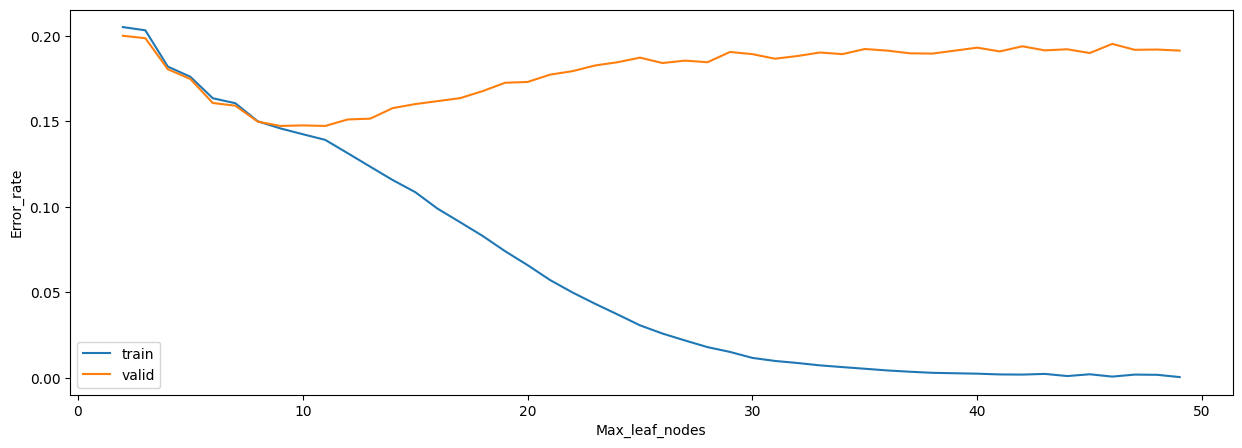

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
plt.xlabel('Max_leaf_nodes')
plt.ylabel("Error_rate")
plt.plot(range(2,50), result_test, label='train')
plt.plot(range(2,50), result_valid, label='valid')
plt.legend()
plt.show()

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
annotations = tree.plot_tree(clf, feature_names = x_names_test, class_names = ['<=50K', '>50K'], filled = True)
for i in range(len(annotations)):
    print(annotations[i])